<a href="https://colab.research.google.com/github/ShauryaSingh19/Random-Forest-Regressor/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection  import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv('Dataset1.csv')
df.head()

,Date,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow
0,22/05/2004,10.7415,0.00,0.00,0.000000,0.000000,0.0,10.7415
1,23/05/2004,34.3655,8.05,3.20,0.340755,0.135455,2242.0,23.6240
2,24/05/2004,58.6060,8.12,5.03,0.334977,0.207504,2283.0,24.2405
3,25/05/2004,83.7587,8.01,3.10,0.318455,0.123247,2323.0,25.1527
4,26/05/2004,108.0027,5.58,1.43,0.230160,0.058984,2328.5,24.2440


In [ ]:
forecast_col = 'Total flow'     #choosing which column to forecast
forecast_out = 10               #how far to forecast
test_size = 0.3;                #the size of my test set

In [ ]:
label = df[forecast_col].shift(-forecast_out)    #creating new column called label with the last 10 rows are nan
X = np.array(df[[forecast_col]])
X = preprocessing.scale(X)                       #processing the feature array
X_lately = X[-forecast_out:]                     #creating the column to use later in the predicting method
X = X[:-forecast_out]                            # X that will contain the training and testing
label.dropna(inplace=True)                       #dropping na values
df.index = df.Date
df.drop('Date', axis=1, inplace=True)
Y = np.array(label)                              # assigning Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size) #cross validation

In [ ]:
#initializing  regression model
learner = RandomForestRegressor()

In [ ]:
learner.fit(X_train,Y_train)   #training the  model


RandomForestRegressor()

In [ ]:
score=learner.score(X_train,Y_train)
score

0.9919071577406665

In [ ]:
score2=learner.score(X_test,Y_test)  #testing  model
score2

0.9471220139147909

In [ ]:
predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train)

In [ ]:
forecast= learner.predict(X_lately)  #set that will contain the forecasted data
response={}#creting dictionary
response['train_score']=score*100
response['test_score']=score2*100
response['forecast_set']=forecast
response

{'train_score': 99.19071577406665,
 'test_score': 94.71220139147908,
 'forecast_set': array([10.788466, 11.01546 , 11.009974, 10.563765, 10.80943 , 10.481485,
        10.624085, 10.574448, 10.911683, 16.390526])}

In [ ]:
MAE = metrics.mean_absolute_error(Y_test, predictions_test)
print( " Mean Absolute Error (MSE)  : " , MAE)

 Mean Absolute Error (MSE)  :  1.052482244996756


In [ ]:
MSE = metrics.mean_squared_error(Y_test, predictions_test)
print( " Mean Squared  Error  : " , MSE)

 Mean Squared  Error  :  5.762801526244854


In [ ]:
result = learner.score(X_test, Y_test)
print((" Accuracy: %.3f%%") % (result*100.0))

 Accuracy: 94.712%


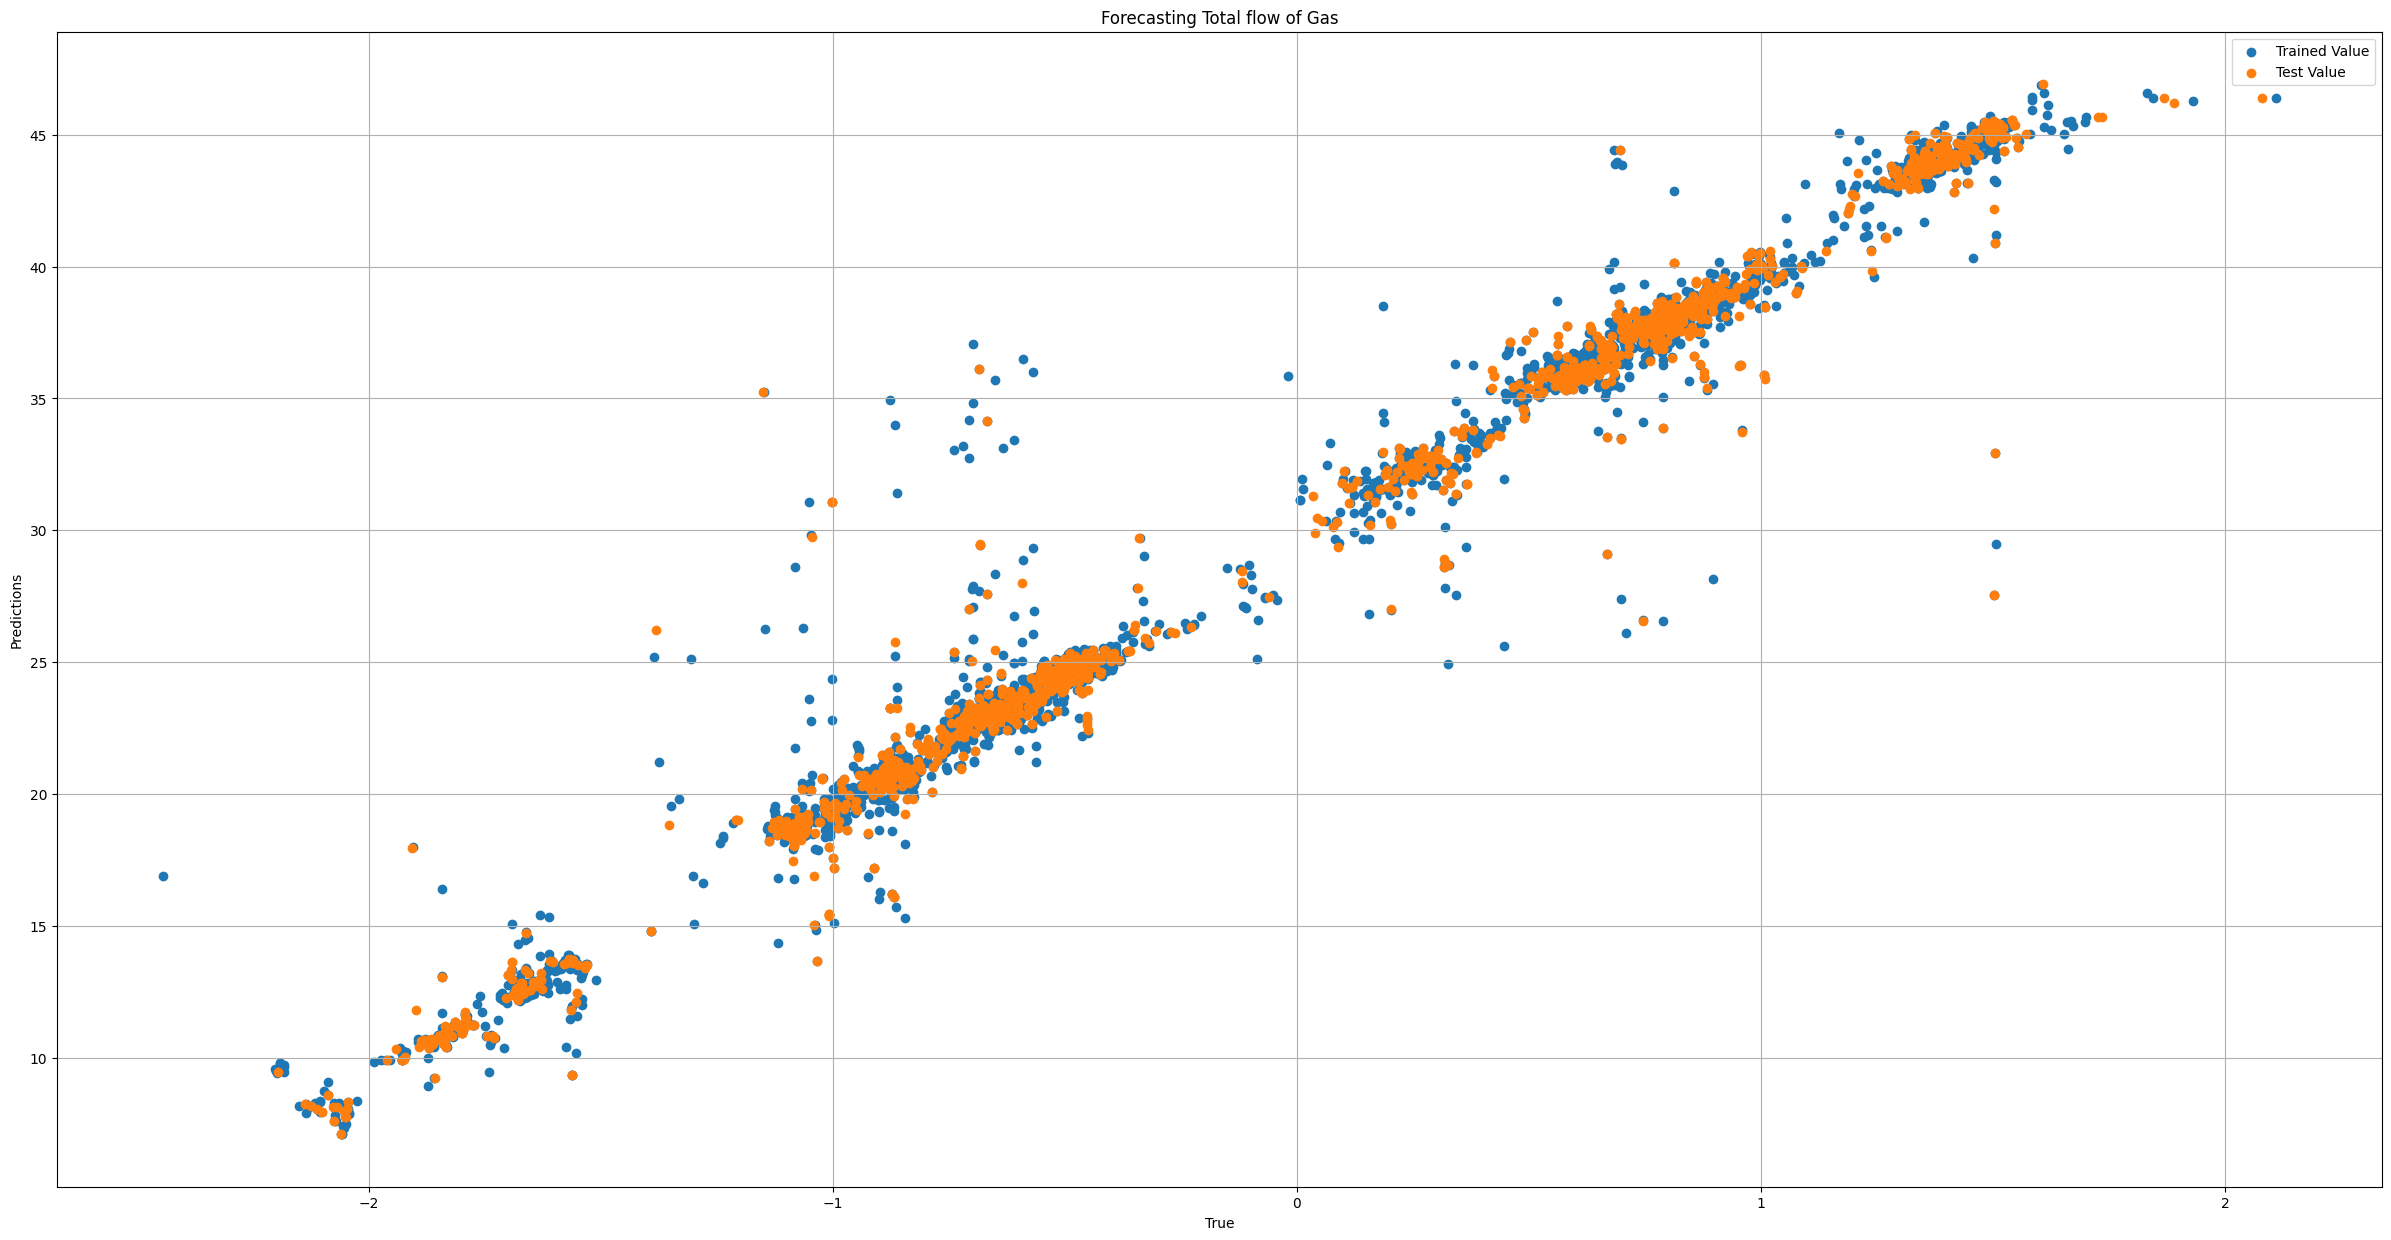

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (30, 15))
plt.scatter(X_train,predictions_train, label='Trained Value')
plt.scatter(X_test,predictions_test,label='Test Value')
plt.title('Forecasting Total flow of Gas')
plt.xlabel('True' )
plt.ylabel('Predictions')
plt.grid(True)
plt.legend()
plt.show()